In [1]:
import pickle as pkl
import json

In [15]:
detection_file = '/data/home/lanyanyan/hongxin/code/reason/tvr_extend_tool/ns-vqa/data/mask_rcnn/results/clevr_val_pretrained/detections.pkl'

In [31]:
ann_file = '/data/home/lanyanyan/hongxin/code/reason/tvr_extend_tool/ns-vqa/data/raw/CLEVR_mini/CLEVR_mini_coco_anns.json'

In [16]:
data = pkl.load(open(detection_file, 'rb'))

In [17]:
data.keys()

dict_keys(['all_boxes', 'all_segms', 'all_keyps', 'cfg'])

In [23]:
print(len(data['all_boxes'][0]))

4000


In [30]:
data['all_boxes'][5][1]

array([], shape=(0, 5), dtype=float32)

In [33]:
with open(ann_file) as f:
    ann = json.load(f)

In [50]:
from pycocotools.mask import decode

In [53]:
decode(ann['scenes'][0]['objects'][0]['mask'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [49]:
ann['scenes'][0]['objects'][0]['mask']['counts']

str

In [39]:
print(len(ann['scenes']))
ann['scenes'][0]

4000


{'split': 'new',
 'directions': {'above': [0.0, 0.0, 1.0],
  'front': [0.754490315914154, -0.6563112735748291, -0.0],
  'left': [-0.6563112735748291, -0.7544902563095093, 0.0],
  'behind': [-0.754490315914154, 0.6563112735748291, 0.0],
  'right': [0.6563112735748291, 0.7544902563095093, -0.0],
  'below': [-0.0, -0.0, -1.0]},
 'image_index': 0,
 'relationships': {'behind': [[1, 5, 7, 9],
   [],
   [0, 1, 5, 6, 7, 9],
   [0, 1, 2, 4, 5, 6, 7, 8, 9],
   [0, 1, 2, 5, 6, 7, 8, 9],
   [1, 7],
   [0, 1, 5, 7, 9],
   [1],
   [0, 1, 2, 5, 6, 7, 9],
   [1, 5, 7]],
  'front': [[2, 3, 4, 6, 8],
   [0, 2, 3, 4, 5, 6, 7, 8, 9],
   [3, 4, 8],
   [],
   [3],
   [0, 2, 3, 4, 6, 8, 9],
   [2, 3, 4, 8],
   [0, 2, 3, 4, 5, 6, 8, 9],
   [3, 4],
   [0, 2, 3, 4, 6, 8]],
  'right': [[5, 6, 8],
   [0, 3, 5, 6, 7, 8],
   [0, 1, 3, 4, 5, 6, 7, 8],
   [0, 5, 6, 7, 8],
   [0, 1, 3, 5, 6, 7, 8],
   [6],
   [],
   [0, 5, 6, 8],
   [5, 6],
   [0, 1, 2, 3, 4, 5, 6, 7, 8]],
  'left': [[1, 2, 3, 4, 7, 9],
   [2, 4, 9],


In [40]:
scene_file = '/data/home/lanyanyan/hongxin/data/clevr/scenes.json'

In [41]:
with open(scene_file) as f:
    scene = json.load(f)

In [44]:
scene['scenes'][0]

{'image_index': 0,
 'objects': [{'color': 'brown',
   'size': 'large',
   'rotation': 178.92387258999463,
   'shape': 'cylinder',
   '3d_coords': [-1.4937210083007812, -1.9936031103134155, 0.699999988079071],
   'material': 'rubber',
   'pixel_coords': [119, 131, 10.801968574523926]},
  {'color': 'gray',
   'size': 'large',
   'rotation': 243.405459279722,
   'shape': 'cube',
   '3d_coords': [1.555708646774292, -2.104736566543579, 0.699999988079071],
   'material': 'rubber',
   'pixel_coords': [198, 190, 8.60103988647461]},
  {'color': 'green',
   'size': 'small',
   'rotation': 230.45235024165092,
   'shape': 'cylinder',
   '3d_coords': [-2.342184543609619, -0.5205014944076538, 0.3499999940395355],
   'material': 'rubber',
   'pixel_coords': [161, 118, 12.372727394104004]},
  {'color': 'purple',
   'size': 'large',
   'rotation': 31.654351858799153,
   'shape': 'sphere',
   '3d_coords': [-0.8073106408119202, 1.914123773574829, 0.699999988079071],
   'material': 'metal',
   'pixel_coor

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [60]:
from model.block import resnet_fpn_backbone
import torch

In [160]:
resnet18 = resnet_fpn_backbone('resnet18', c_in=3)

In [161]:
x = torch.ones(10,3,120,160)

In [162]:
y = resnet18(x)

In [163]:
type(y)

collections.OrderedDict

In [64]:
print([(k, v.shape) for k, v in y.items()])

[('0', torch.Size([10, 256, 30, 40])), ('1', torch.Size([10, 256, 15, 20])), ('2', torch.Size([10, 256, 8, 10])), ('3', torch.Size([10, 256, 4, 5])), ('pool', torch.Size([10, 256, 2, 3]))]


In [37]:
from pycocotools.mask import encode, decode, toBbox

In [38]:
encode??

Signature: encode(bimask)
Docstring: <no docstring>
Source:   
def encode(bimask):
    if len(bimask.shape) == 3:
        return _mask.encode(bimask)
    elif len(bimask.shape) == 2:
        h, w = bimask.shape
        return _mask.encode(bimask.reshape((h, w, 1), order='F'))[0]
File:      ~/.miniconda3/lib/python3.7/site-packages/pycocotools/mask.py
Type:      function


In [18]:
import jsonlines

In [19]:
with jsonlines.open('/data/home/lanyanyan/hongxin/data/trance/data_mask.jsonl') as reader:
    data = list(reader)

In [31]:
toBbox(data[0]['states'][0]['objects'][0]['mask']['Camera_Center'])

array([0., 0., 0., 0.])

In [36]:
data[0]['states'][0]['objects'][0]['mask']['Camera_Center']['counts'] == 'PP[2'

True

In [ ]:
def get_bbox(data):
    init_objects = data['states'][0]['objects']

In [41]:
a = [1, 2]
b = [*a, *a]

In [42]:
b

[1, 2, 1, 2]

In [ ]:
with jsonlines.open('/data/home/lanyanyan/hongxin/data/trance/data_mask.jsonl') as reader:
    data = list(reader)

In [43]:
len(data)

530000

In [62]:
train_split = data[:500000]
val_split = data[500000:510000]
test_split = data[510000:530000]

In [61]:
import h5py
import json
from tqdm.notebook import tqdm

In [64]:
f = h5py.File('/data/home/lanyanyan/hongxin/data/trance/data.h5', 'r+', libver='latest')

In [65]:
train_data = f['train']['data']
for sample in tqdm(train_split):
    name = str(sample['idx'])
    f_sample = train_data[name]
    f_sample[...] = json.dumps(sample)

  0%|          | 0/500000 [00:00<?, ?it/s]

In [66]:
val_data = f['val']['data']
for sample in tqdm(val_split):
    name = str(sample['idx'])
    f_sample = val_data[name]
    f_sample[...] = json.dumps(sample)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [68]:
test_data = f['test']['data']
for sample in tqdm(test_split):
    name = str(sample['idx'])
    f_sample = test_data[name]
    f_sample[...] = json.dumps(sample)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [69]:
f.close()

In [70]:
f = h5py.File('/data/home/lanyanyan/hongxin/data/trance/data.h5', 'r', libver='latest')

In [2]:
from dataset.trance import Basic, View, Event

In [7]:
data_root='/data/home/lanyanyan/hongxin/data/trance'
split='train'
values_json='../data/gen_src/resource/values.json'
properties_json='../data/gen_src/resource/properties.json'

In [126]:
basic = Basic(data_root=data_root, split='train', values_json=values_json, properties_json=properties_json, use_box=False, img_aug=True)

In [127]:
sample = basic[0]

In [128]:
sample['init_boxes']

In [19]:
from torchvision.utils import draw_bounding_boxes
import torch

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F
plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [46]:
from torchvision.ops._utils import convert_boxes_to_roi_format

In [49]:
convert_boxes_to_roi_format([torch.as_tensor(basic[0]['init_boxes']), torch.as_tensor(basic[1]['init_boxes'])])

tensor([[  0.0000,  16.6092,  67.3401,  43.1092,  98.3401],
        [  0.0000, 115.1092,  65.8401, 137.1092,  87.3401],
        [  1.0000,  18.1719,  39.2161,  55.1719,  82.2161],
        [  1.0000,  56.1719,  56.2161,  77.6719,  77.7161],
        [  1.0000,  78.1719,  55.2161,  87.6719,  64.7161],
        [  1.0000,  74.1719,  25.7161,  99.6719,  51.7161],
        [  1.0000, 106.6719,  78.2161, 119.1719,  94.7161]])

In [42]:
sample['init_boxes']

array([[ 21.448093,  60.711018,  47.948093,  91.71101 ],
       [119.94809 ,  59.211018, 141.94809 ,  80.71101 ]], dtype=float32)

In [43]:
sample['init'].shape

(3, 120, 160)

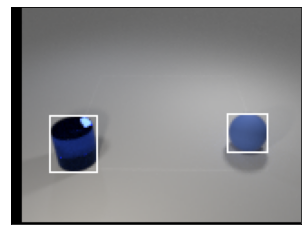

In [45]:
boxes = draw_bounding_boxes(torch.tensor(sample['init']), torch.tensor(sample['init_boxes']))
show(boxes)

In [50]:
from dataset.collate import box_collate
train_loader = torch.utils.data.DataLoader(
    dataset=basic,
    batch_size=4,
    shuffle=False,
    num_workers=2,
    pin_memory=True,
    collate_fn=box_collate)
        

In [149]:
batch = next(iter(train_loader))

In [168]:
batch['init'].shape

[autoreload of model failed: Traceback (most recent call last):
  File "/data/home/lanyanyan/hongxin/.miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/data/home/lanyanyan/hongxin/.miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/data/home/lanyanyan/hongxin/.miniconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/data/home/lanyanyan/hongxin/.miniconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../model/__init__.py", line 11, in <module>
    from .trancenet import (
ImportError: cannot import name 

torch.Size([4, 3, 120, 160])

In [85]:
batch['init_boxes']

tensor([[  0.0000,   6.2779,   1.3280, 166.2779, 121.3280],
        [  0.0000, 120.2779,  61.3280, 142.2779,  82.8280],
        [  0.0000,  21.7779,  62.8280,  48.2779,  93.8280],
        [  1.0000,   0.8187,  -2.7006, 160.8187, 117.2994],
        [  1.0000, 102.3187,  72.7994, 114.8187,  89.2994],
        [  1.0000,  69.8187,  20.2994,  95.3187,  46.2994],
        [  1.0000,  73.8187,  49.7994,  83.3187,  59.2994],
        [  1.0000,  51.8187,  50.7994,  73.3187,  72.2994],
        [  1.0000,  13.8187,  33.7994,  50.8187,  76.7994],
        [  2.0000,   2.7095,  -2.2254, 162.7095, 117.7746],
        [  2.0000,  75.7095,  70.7746,  87.2095,  82.2746],
        [  2.0000,  27.2095,  59.7746,  50.7095,  82.7746],
        [  2.0000,  41.7095,  41.2746,  50.2095,  49.7746],
        [  2.0000,  62.7095,  43.2746,  78.7095,  61.7746],
        [  2.0000, 113.2095,  23.2746, 145.7095,  60.2746],
        [  2.0000, 135.2095,  78.2746, 147.7095,  90.2746],
        [  3.0000,   4.4826,  -5.8393, 1

In [86]:
batch['fin_boxes']

tensor([[  0.0000,   6.2779,   1.3280, 166.2779, 121.3280],
        [  0.0000,  43.2779,  24.8280,  64.2779,  46.3280],
        [  0.0000,  21.7779,  62.8280,  48.2779,  93.8280],
        [  0.0000, 120.2779,  61.3280, 142.2779,  82.8280],
        [  1.0000,   0.8187,  -2.7006, 160.8187, 117.2994],
        [  1.0000,  51.8187,  50.7994,  73.3187,  72.2994],
        [  1.0000,  13.8187,  33.7994,  50.8187,  76.7994],
        [  1.0000, 102.3187,  72.7994, 114.8187,  89.2994],
        [  1.0000,  69.8187,  20.2994,  95.3187,  46.2994],
        [  1.0000,  73.8187,  49.7994,  83.3187,  59.2994],
        [  2.0000,   2.7095,  -2.2254, 162.7095, 117.7746],
        [  2.0000,  27.2095,  59.7746,  50.7095,  82.7746],
        [  2.0000,  75.7095,  70.7746,  87.2095,  82.2746],
        [  2.0000, 113.2095,  23.2746, 145.7095,  60.2746],
        [  2.0000,  41.7095,  41.2746,  50.2095,  49.7746],
        [  2.0000, 135.2095,  78.2746, 147.7095,  90.2746],
        [  2.0000,  62.7095,  43.2746,  

In [66]:
from model.encoder import MaskRCNNEncoder

In [154]:
encoder = MaskRCNNEncoder('concat', 'resnet18').to(torch.device('cuda'))

In [157]:
outputs = encoder(
    batch['init'].float().div(255).cuda(),
    batch['fin'].float().div(255).cuda(),
    batch['init_boxes'].cuda(),
    batch['fin_boxes'].cuda(),
    tuple(batch['n_init']), tuple(batch['n_fin']))

backbone


In [158]:
outputs.shape

torch.Size([4, 512, 1, 1])

In [79]:
outputs.keys()
print([(k, v.shape) for k, v in outputs.items()])

[('0', torch.Size([15, 256, 7, 7])), ('1', torch.Size([15, 256, 7, 7])), ('2', torch.Size([15, 256, 7, 7])), ('3', torch.Size([15, 256, 7, 7])), ('pool', torch.Size([4, 256, 2, 3]))]


In [82]:
batch['init_boxes'][:,0] == 0

tensor([ True,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False])

In [107]:
batch['init_boxes'].shape

torch.Size([19, 5])

In [91]:
x = torch.zeros(19, 256, 7, 7)

In [93]:
x[batch['init_boxes'][:,0] == 0].shape

torch.Size([3, 256, 7, 7])

In [96]:
import torch.nn.functionalal as F

In [99]:
F.adaptive_max_pool3d(x.permute(1,2,3,0), (1,1,1)).squeeze

Object `squeeze` not found.


In [105]:
a = F.adaptive_max_pool3d(x.permute(1,2,3,0), (1,1,1)).flatten()

In [106]:
torch.stack([a, a]).shape

torch.Size([2, 256])

In [111]:
a[...,None,None].shape

torch.Size([256, 1, 1])

In [112]:
F.adaptive_max_pool1d(torch.zeros(10,9,8), (1)).shape

torch.Size([10, 9, 1])

In [129]:
batch['init_boxes'][:,0]

tensor([0., 0., 0., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
        3.])

In [147]:
torch.unique(batch['init_boxes'][:,0], return_counts=True)

(tensor([0., 1., 2., 3.]), tensor([3, 6, 7, 3]))

In [148]:
torch.unique_consecutive(batch['init_boxes'][:,0], return_counts=True)

(tensor([0., 1., 2., 3.]), tensor([3, 6, 7, 3]))

In [139]:
torch.mean(x, dim=(-2, -1)).shape

torch.Size([19, 256])

In [159]:
type(outputs)

[autoreload of model.encoder failed: Traceback (most recent call last):
  File "/data/home/lanyanyan/hongxin/.miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/data/home/lanyanyan/hongxin/.miniconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/data/home/lanyanyan/hongxin/.miniconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/data/home/lanyanyan/hongxin/.miniconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap

torch.Tensor

In [164]:
x.shape

torch.Size([10, 3, 120, 160])

In [166]:
torch.stack([x, x], dim=1).shape

torch.Size([10, 2, 3, 120, 160])

In [167]:
x.new_zeros(22 - x.size(0)).shape

torch.Size([12])